In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = dataset.iloc[:, [3,4]].values

In [5]:
from sklearn.cluster import KMeans

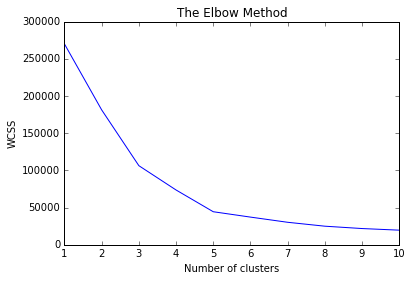

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
ymeans = kmeans.fit_predict(X)

In [9]:
ymeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4])

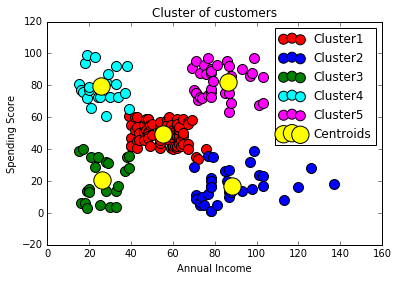

In [10]:
plt.scatter(X[ymeans==0, 0], X[ymeans==0, 1], c = 'red', s = 100, label = 'Cluster1')
plt.scatter(X[ymeans==1, 0], X[ymeans==1, 1], c = 'blue', s = 100, label = 'Cluster2')
plt.scatter(X[ymeans==2, 0], X[ymeans==2, 1], c = 'green', s = 100, label = 'Cluster3')
plt.scatter(X[ymeans==3, 0], X[ymeans==3, 1], c = 'cyan', s = 100, label = 'Cluster4')
plt.scatter(X[ymeans==4, 0], X[ymeans==4, 1], c = 'magenta', s = 100, label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

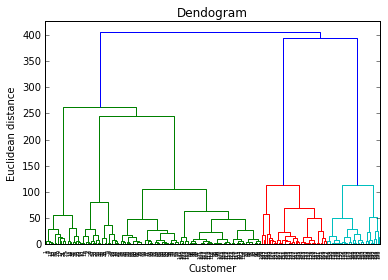

In [14]:
import scipy.cluster.hierarchy as sch
dedogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean distance')
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

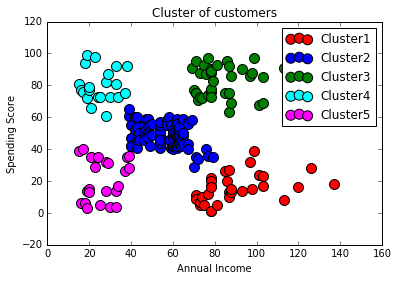

In [17]:
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], c = 'red', s = 100, label = 'Cluster1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], c = 'blue', s = 100, label = 'Cluster2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], c = 'green', s = 100, label = 'Cluster3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], c = 'cyan', s = 100, label = 'Cluster4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], c = 'magenta', s = 100, label = 'Cluster5')
plt.title('Cluster of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()